<a href="https://colab.research.google.com/github/gmenshi4/demo_test/blob/main/Peer-graded%20Assignment%3A%20The%20best%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [ ]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-29 23:00:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.01s   

2022-08-29 23:00:42 (1.51 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [ ]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
df.shape

(346, 10)

### Convert to date time object


In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

/bin/bash: conda: command not found


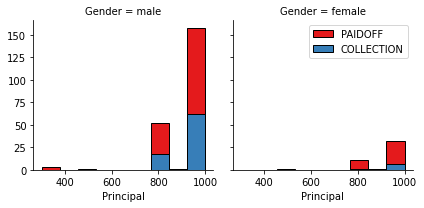

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

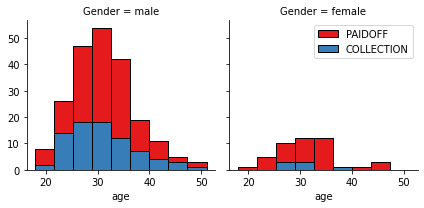

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


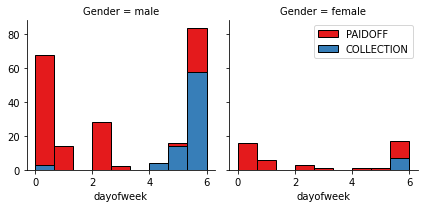

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame


In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [ ]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our labels?


In [ ]:
df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[1, 0], inplace=True)
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


Now that we have prepared the data, let us split it into test and training data

In [ ]:
# Split the data using train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


#### Finding the best Value for K
We will set the values of k from 1 to 15 and iterate over each othem evaluating for their acuracy and find the best value for k which we will then use to fit our model.

In [ ]:
# Import needed libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

ks = 15
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
  neigh_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
  yhat_k = neigh_knn.predict(X_test)

  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_k)
  std_acc[n-1] = np.std(yhat_k==y_test)/np.sqrt(yhat_k.shape[0])

print(mean_acc)

[0.64285714 0.58571429 0.74285714 0.7        0.74285714 0.71428571
 0.8        0.75714286 0.74285714 0.68571429 0.71428571 0.71428571
 0.68571429 0.7       ]


#### Plot the model accuracy for different values of k

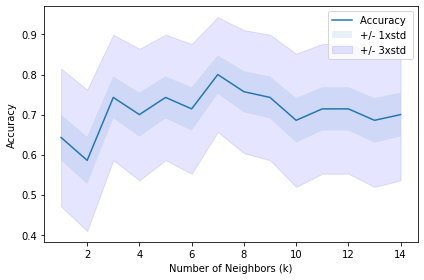

In [ ]:
plt.plot(range(1, ks), mean_acc)
plt.fill_between(range(1, ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.fill_between(range(1, ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10, color = "blue")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

In [ ]:
best_k = mean_acc.argmax()+1
print(f'The best accuracy was with {mean_acc.max()}, with k = {best_k}')

The best accuracy was with 0.8, with k = 7


#### Training and Evaluation of the model

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = best_k).fit(X_train, y_train)
yhat_knn = neigh.predict(X_test)

# Evaluating the train set and test set accuracies
print('Train set accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat_knn))

Train set accuracy:  0.8043478260869565
Test set accuracy:  0.8


In [ ]:
# Evaluating the Jaccard and F1 scores of the model
from sklearn.metrics import jaccard_score, f1_score

score_matrix = {}

score_matrix['knn_jaccard'] = jaccard_score(y_test, yhat_knn)
score_matrix['knn_f1_score'] = f1_score(y_test, yhat_knn)
score_matrix

{'knn_jaccard': 0.7741935483870968, 'knn_f1_score': 0.8727272727272727}

In [ ]:
# Training the model using the whole dataset
neigh_final = KNeighborsClassifier(n_neighbors = best_k).fit(X, y)

# Decision Tree


In [ ]:
# Import the needed libraries
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Evaluating for the best max_depth value
train_acc = []
valid_acc = []

for depth in range(1, 10):
  dt_model = DecisionTreeClassifier(max_depth= depth, random_state = 4)
  dt_model.fit(X_train, y_train)
  train_acc.append(dt_model.score(X_train, y_train))
  valid_acc.append(dt_model.score(X_test, y_test))

In [ ]:
frame = pd.DataFrame({'max_depth': range(1, 10), 'train_acc': train_acc, 'valid_acc': valid_acc})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.742754,0.785714
1,2,0.742754,0.785714
2,3,0.746377,0.614286
3,4,0.746377,0.614286
4,5,0.768116,0.628571


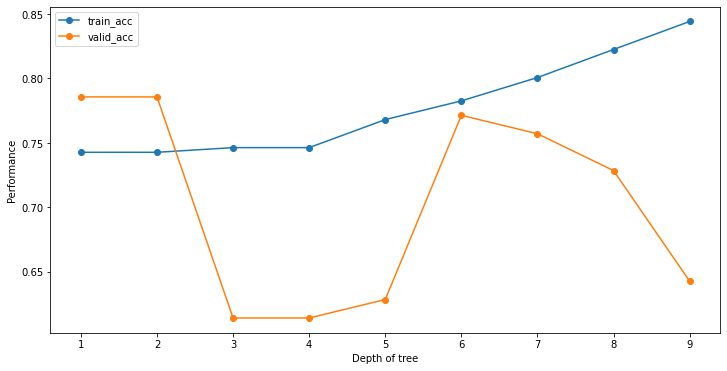

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o', label='train_acc')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o', label='valid_acc')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

In [ ]:
# Creating an instance of the DecisionTreeClassifier called loan_tree, specifying the crterion as "entropy"
loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=4)

In [ ]:
# Fitting the model
loan_tree.fit(X_train, y_train)

yhat_dt = loan_tree.predict(X_test)

In [ ]:
# Evaluating the train set and test set accuracies
print('Train set accuracy: ', metrics.accuracy_score(y_train, loan_tree.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat_dt))

Train set accuracy:  0.7753623188405797
Test set accuracy:  0.7714285714285715


In [ ]:
# Visualizing the tree
!pip install graphviz
!pip install pydotplus
!pip install Ipython

from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


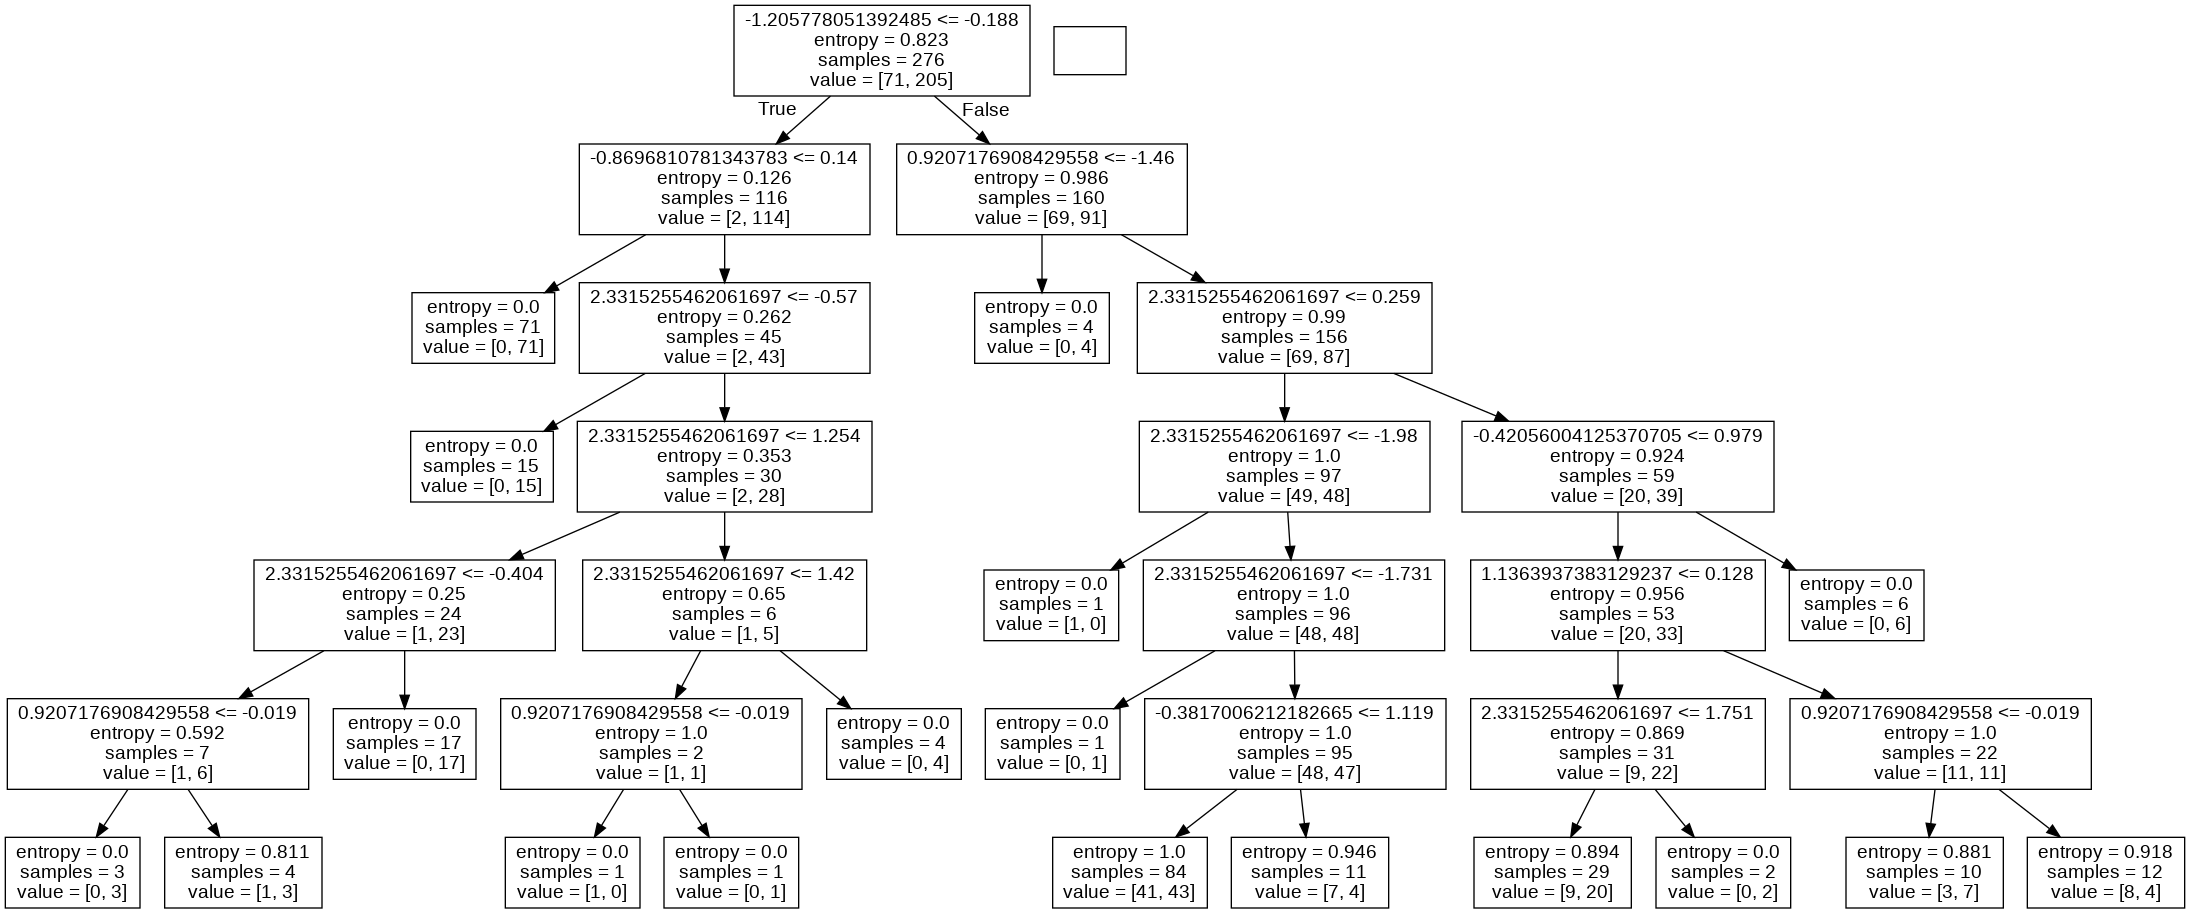

In [ ]:
featureNames = X[0, :]
decision_tree = tree.export_graphviz(loan_tree, out_file = None, feature_names = featureNames)

graph = pydotplus.graph_from_dot_data(decision_tree)

Image(graph.create_png())

In [ ]:
# Evaluating the Jaccard and F1 scores of the model
score_matrix['tree_jaccard'] = jaccard_score(y_test, yhat_dt)
score_matrix['tree_f1_score'] = f1_score(y_test, yhat_dt)
score_matrix

{'knn_jaccard': 0.7741935483870968,
 'knn_f1_score': 0.8727272727272727,
 'tree_jaccard': 0.7681159420289855,
 'tree_f1_score': 0.8688524590163933}

In [ ]:
# Training the model Using the whole dataset
tree_final = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=4).fit(X, y)

# Support Vector Machine


In [ ]:
# Importing Libraries
from sklearn import svm

In [ ]:
# Creating and fitting the model
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)

In [ ]:
# Evaluating the train set and test set accuracies
print('Train set accuracy: ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat_svm))

Train set accuracy:  0.782608695652174
Test set accuracy:  0.7428571428571429


In [ ]:
# Evaluating the Jaccard and F1 scores of the model
score_matrix['svm_jaccard'] = jaccard_score(y_test, yhat_svm)
score_matrix['svm_f1_score'] = f1_score(y_test, yhat_svm)
score_matrix

{'knn_jaccard': 0.7741935483870968,
 'knn_f1_score': 0.8727272727272727,
 'tree_jaccard': 0.7681159420289855,
 'tree_f1_score': 0.8688524590163933,
 'svm_jaccard': 0.7272727272727273,
 'svm_f1_score': 0.8421052631578948}

In [ ]:
# Training the model Using the whole dataset
clf_final = svm.SVC(kernel='rbf').fit(X, y)

# Logistic Regression


In [ ]:
# Importing Needed libraries
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating an instance of the model and fitting it
LR = LogisticRegression(C=0.01, solver='liblinear', random_state=4).fit(X_train, y_train)
yhat_LR = LR.predict(X_test)
yprob = LR.predict_proba(X_test)

In [ ]:
# Evaluating the Jaccard, F1 and Logloss scores of the model
from sklearn.metrics import log_loss

score_matrix['LR_jaccard'] = jaccard_score(y_test, yhat_LR)
score_matrix['LR_f1_score'] = f1_score(y_test, yhat_LR)
score_matrix['LR_log_loss'] = log_loss(y_test, yprob)
score_matrix

{'knn_jaccard': 0.7741935483870968,
 'knn_f1_score': 0.8727272727272727,
 'tree_jaccard': 0.7681159420289855,
 'tree_f1_score': 0.8688524590163933,
 'svm_jaccard': 0.7272727272727273,
 'svm_f1_score': 0.8421052631578948,
 'LR_jaccard': 0.6764705882352942,
 'LR_f1_score': 0.8070175438596492,
 'LR_log_loss': 0.5772287609479654}

In [ ]:
# Training the model Using the whole dataset
LR_final = LogisticRegression(C=0.01, solver='liblinear', random_state=4).fit(X, y)

#### Training Set Accuracy

In [ ]:
Jaccard = [score_matrix['knn_jaccard'], score_matrix['tree_jaccard'], score_matrix['svm_jaccard'], score_matrix['LR_jaccard']]
f1 = [score_matrix['knn_f1_score'], score_matrix['tree_f1_score'], score_matrix['svm_f1_score'], score_matrix['LR_f1_score']]
log_l = ['NA', 'NA', 'NA', score_matrix['LR_log_loss']]

df_dict = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'], \
           'Jaccard': Jaccard, 'F1 Score': f1, 'Log Loss': log_l}

trining_set_report = pd.DataFrame(df_dict, columns=['Algorithm', 'Jaccard', 'F1 Score', 'Log Loss'], index=None)
trining_set_report

,Algorithm,Jaccard,F1 Score,Log Loss
0,KNN,0.774194,0.872727,NA
1,Decision Tree,0.768116,0.868852,NA
2,SVM,0.727273,0.842105,NA
3,Logistic Regression,0.676471,0.807018,0.577229


# Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-29 23:00:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-08-29 23:00:55 (1.05 GB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


#### Preparing the test data

In [ ]:
# Convert the date columns to date time objects
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])

# Extract day of week from the effective date column
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

# Because people who get the loans at the end of the week don't pay it off, we use Feature binarization to set a threshold value of weekend less than day 4
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)

# Convert male and female values in the Gender column to 0 and 1 respectively
test_df['Gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)

# Selecting test features
features2 = test_df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
features2 = pd.concat([features2, pd.get_dummies(test_df['education'])], axis=1)
features2.drop(['Master or Above'], axis = 1, inplace = True)

features2.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


#### Defining our test sets

In [ ]:
# Defining the x test and normalizing it
x_test1 = features2
x_test1 = preprocessing.StandardScaler().fit(x_test1).transform(x_test1)
print(x_test1[0:5])

# Defining the y_test
y_test1 = test_df['loan_status'].replace(to_replace = ['PAIDOFF', 'COLLECTION'], value = [1, 0])

[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]


#### KNN Model Evaluation

In [ ]:
# Prediction using the test data
yhat_knn_final = neigh_final.predict(x_test1)

# Evaluating
test_matrix = {}
test_matrix['jaccard_knn'] = jaccard_score(y_test1, yhat_knn_final)
test_matrix['f1_knn'] = f1_score(y_test1, yhat_knn_final)
test_matrix

{'jaccard_knn': 0.7, 'f1_knn': 0.823529411764706}

Decision Tree Model Evaluation

In [ ]:
 # Predicition using the test data
yhat_tree_final = tree_final.predict(x_test1)

# Evaluating
test_matrix['jaccard_tree'] = jaccard_score(y_test1, yhat_tree_final)
test_matrix['f1_tree'] = f1_score(y_test1, yhat_tree_final)
test_matrix

{'jaccard_knn': 0.7,
 'f1_knn': 0.823529411764706,
 'jaccard_tree': 0.7254901960784313,
 'f1_tree': 0.840909090909091}

SVM Model Evaluation

In [ ]:
# Predicition using the test data
yhat_svm_final = clf_final.predict(x_test1)

# Evaluating
test_matrix['jaccard_svm'] = jaccard_score(y_test1, yhat_svm_final)
test_matrix['f1_svm'] = f1_score(y_test1, yhat_svm_final)
test_matrix

{'jaccard_knn': 0.7,
 'f1_knn': 0.823529411764706,
 'jaccard_tree': 0.7254901960784313,
 'f1_tree': 0.840909090909091,
 'jaccard_svm': 0.7222222222222222,
 'f1_svm': 0.8387096774193549}

#### Logistic Regression Model


In [ ]:
# Predicition using the test data
yhat_LR_final = LR_final.predict(x_test1)
yprob_final = LR_final.predict_log_proba(x_test1)

# Evaluating
test_matrix['LR_jaccard'] = jaccard_score(y_test1, yhat_LR_final)
test_matrix['LR_f1_score'] = f1_score(y_test1, yhat_LR_final)
test_matrix['LR_log_loss'] = log_loss(y_test1, yprob_final)
test_matrix

{'jaccard_knn': 0.7,
 'f1_knn': 0.823529411764706,
 'jaccard_tree': 0.7254901960784313,
 'f1_tree': 0.840909090909091,
 'jaccard_svm': 0.7222222222222222,
 'f1_svm': 0.8387096774193549,
 'LR_jaccard': 0.7407407407407407,
 'LR_f1_score': 0.851063829787234,
 'LR_log_loss': 0.6931471805599455}

### Final Report

# Report

The accuracy of the built models using different evaluation metrics is shown below:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.70000 | 0.82353  | NA      |
| Decision Tree      | 0.72549 | 0.84091  | NA      |
| SVM                | 0.72222 | 0.83871  | NA      |
| LogisticRegression | 0.74074 | 0.85106  | 0.69315 |


**From the above table, we can see that the "Logistic Regression" model outperforms the other models with the "KNN" model showing the poorest performance**

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
